In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten,\
BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# download the data from https://www.kaggle.com/datasets/tongpython/cat-and-dog
train_path = 'archive/training_set/training_set/'
test_path = 'archive/test_set/test_set/'

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2) 

train_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['cats', 'dogs'], batch_size=64,subset='training')

validation_batches = train_datagen.flow_from_directory(directory=train_path, \
target_size=(224,224), classes=['cats', 'dogs'], batch_size=64,subset='validation')

test_batches = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(\
directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], \
batch_size=64, shuffle=False)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),  # strides is the step to take the pooling. here since the winow is 2*2 and stride is 2 then we have each window  taking different pixels
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [8]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',\
# metrics=['accuracy'])

In [9]:
# #model.fit_generator(x=train_batches,validation_ epochs=5, verbose=1)
# hist = model.fit(
#     train_batches,
#     validation_data = validation_batches, 
#     epochs = 10)

In [10]:
# # Display models statistics
# from matplotlib import pyplot as plt
# loss = hist.history['loss']
# val_loss = hist.history['val_loss']
# acc = hist.history['accuracy']
# val_acc = hist.history['val_accuracy']
# epochsr = range(10)
# plt.figure()
# plt.plot(epochsr, loss, 'g', label='Training loss')
# plt.plot(epochsr, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()
# plt.figure()
# plt.plot(epochsr, acc, 'g', label='Training acc')
# plt.plot(epochsr, val_acc, 'b', label='Validation acc')
# plt.title('Accuracy')
# plt.legend()
# plt.show()
# mymodel = hist.model

In [11]:
# # serialize model
# model.save("model.h5")
# print("Saved model to disk")

In [12]:
from tensorflow.keras.models import load_model

# load, create and compile model

model = load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# you could either use this custom function or the built in function from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

In [14]:
# eg of itertools.product (gives you a Cartesian product of lists in Python)
l1 = ['a', 'b', 'c']
l2 = ['X', 'Y', 'Z']

for comb in itertools.product(l1, l2):
    print(comb)

('a', 'X')
('a', 'Y')
('a', 'Z')
('b', 'X')
('b', 'Y')
('b', 'Z')
('c', 'X')
('c', 'Y')
('c', 'Z')


Confusion matrix, without normalization
[[716 295]
 [204 808]]


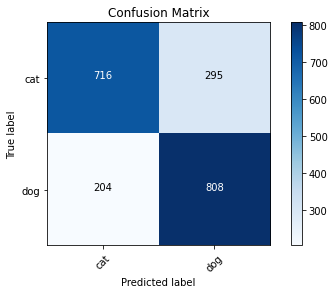

In [15]:
predictions = model.predict(x=test_batches, verbose=0)
cm = confusion_matrix(y_true=test_batches.classes, \
                      y_pred=np.argmax(predictions, axis=-1))

cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [16]:
model.evaluate(train_batches),model.evaluate(validation_batches),model.evaluate(test_batches)

 58/101 [================>.............] - ETA: 2:44 - loss: 0.3798 - accuracy: 0.8394

KeyboardInterrupt: 

In [11]:
def TestImgPreprocessing(path):
    '''
    Resizes all images in a given file path to (224,224) and MinMax scales 
    Return array of images
    Adapted from https://stackoverflow.com/questions/21517879/
    python-pil-resize-all-images-in-a-folder
    '''
    from PIL import Image
    import os
    dirs = sorted(os.listdir(path))
    images = []
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((224,224), Image.ANTIALIAS)
            imResize = np.asarray(imResize)/255
            images.append(imResize)
    return np.asarray(images)

test_imgs = TestImgPreprocessing('downloaded_imgs/')

In [12]:
#Custom model test predictions (open downloaded images folder)
predictions = np.round(model.predict(test_imgs))
print(predictions)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


2022-05-13 07:52:44.188736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [13]:
test_imgs.shape

(15, 224, 224, 3)

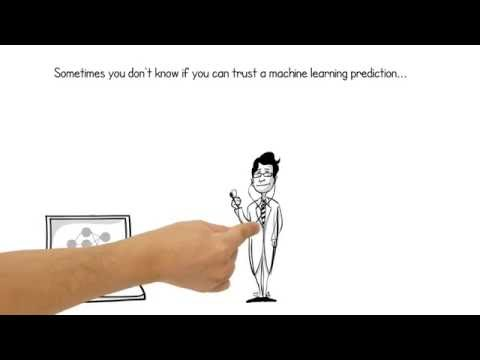

In [17]:
from IPython.display import YouTubeVideo

YouTubeVideo('hUnRCxnydCc', width=800, height=300)

In [18]:
!#pip install lime

     |████████████████████████████████| 275 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 5.9 MB/s eta 0:00:011
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=861556957fd671f113c0fa504ef51c4226da12db26a45cc927cafd391acff317
  Stored in directory: /Users/alexandros.samartzis/Library/Caches/pip/wheels/52/f4/97/327dcd53a8b5e3a9d97111dccbdb4f51a7b644af686dac5088
Successfully built lime


In [19]:
plt.imshow(test_imgs[5])

NameError: name 'test_imgs' is not defined

In [58]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[5], model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [59]:
model.predict(test_imgs)[5]

array([0.38839725, 0.6116028 ], dtype=float32)

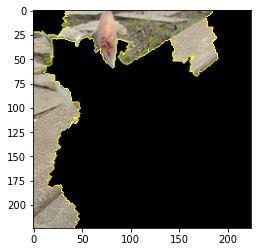

In [72]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=10, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

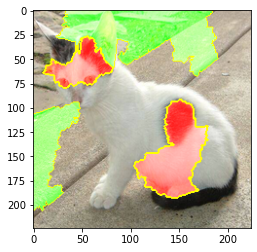

In [73]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=8, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

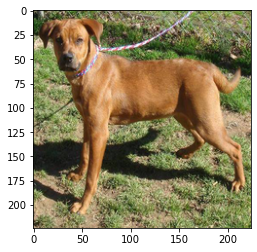

In [21]:
plt.imshow(test_imgs[9])

In [22]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[9], model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
model.predict(test_imgs)[9]

array([0.00828403, 0.99171597], dtype=float32)

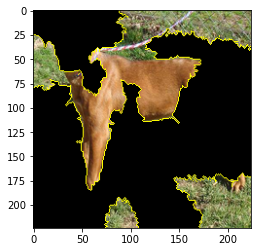

In [24]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=10, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

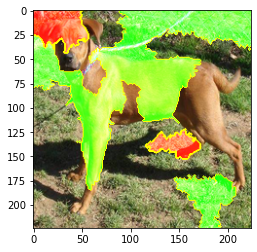

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

### MobileNet

In [26]:
mobile = tf.keras.applications.mobilenet.MobileNet()
model_mobilenet = Sequential()
for layer in mobile.layers[:-5]:
    model_mobilenet.add(layer)
    
for layer in model_mobilenet.layers[:-5]:
    layer.trainable = False
    
model_mobilenet.add(Dense(units=2, activation='softmax'))

In [27]:
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001),\
                        loss='categorical_crossentropy', metrics=['accuracy'])

hist_mobile = model_mobilenet.fit(
    train_batches,
    validation_data = validation_batches, 
    epochs = 10)

Epoch 1/10


2022-05-13 07:53:01.732373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - ETA: 0s - loss: 0.1156 - accuracy: 0.9524

2022-05-13 07:53:48.246610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 58s 567ms/step - loss: 0.1156 - accuracy: 0.9524 - val_loss: 0.2245 - val_accuracy: 0.9163
Epoch 2/10
101/101 [==============================] - 53s 528ms/step - loss: 0.0378 - accuracy: 0.9855 - val_loss: 0.0768 - val_accuracy: 0.9744
Epoch 3/10
101/101 [==============================] - 34s 340ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0437 - val_accuracy: 0.9819
Epoch 4/10
101/101 [==============================] - 27s 269ms/step - loss: 0.0145 - accuracy: 0.9980 - val_loss: 0.0678 - val_accuracy: 0.9756
Epoch 5/10
101/101 [==============================] - 27s 269ms/step - loss: 0.0129 - accuracy: 0.9978 - val_loss: 0.0464 - val_accuracy: 0.9819
Epoch 6/10
101/101 [==============================] - 27s 271ms/step - loss: 0.0091 - accuracy: 0.9991 - val_loss: 0.0437 - val_accuracy: 0.9825
Epoch 7/10
101/101 [==============================] - 27s 269ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0419 - val_accuracy: 0.9

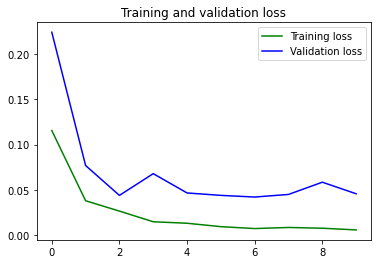

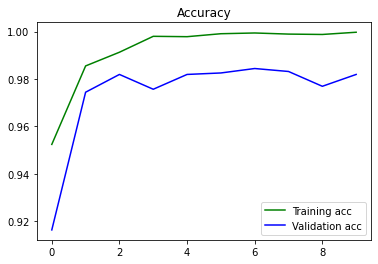

In [33]:
# # Display models statistics
# from matplotlib import pyplot as plt
# loss = hist_mobile.history['loss']
# val_loss = hist_mobile.history['val_loss']
# acc = hist_mobile.history['accuracy']
# val_acc = hist_mobile.history['val_accuracy']
# epochsr = range(10)
# plt.figure()
# plt.plot(epochsr, loss, 'g', label='Training loss')
# plt.plot(epochsr, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()
# plt.figure()
# plt.plot(epochsr, acc, 'g', label='Training acc')
# plt.plot(epochsr, val_acc, 'b', label='Validation acc')
# plt.title('Accuracy')
# plt.legend()
# plt.show()
# mymodel_mobile = hist_mobile.model

In [28]:
# # serialize model
# model_mobilenet.save("model_mobilenet.h5")
# print("Saved model to disk")

Saved model to disk


In [29]:
model_mobilenet = load_model("model_mobilenet.h5")
model_mobilenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

2022-05-13 07:58:37.968046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Confusion matrix, without normalization
[[1007    4]
 [  16  996]]


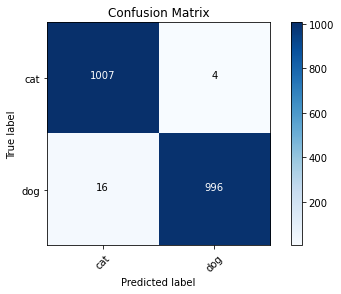

In [30]:
predictions = model_mobilenet.predict(x = test_batches, steps = len(test_batches), verbose = 0)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [31]:
model_mobilenet.evaluate(train_batches),model_mobilenet.evaluate(validation_batches)\
,model_mobilenet.evaluate(test_batches)

2022-05-13 07:58:44.955006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 7s 204ms/step - loss: 0.0308 - accuracy: 0.9901


([0.002024993533268571, 1.0],
 [0.04550713300704956, 0.9818863868713379],
 [0.030784649774432182, 0.9901137351989746])

In [32]:
#Custom model
predictions_mobilenet = np.round(model_mobilenet.predict(test_imgs))
print(predictions)

[[9.9996328e-01 3.6768277e-05]
 [9.9972004e-01 2.7999570e-04]
 [9.9999928e-01 7.0068160e-07]
 ...
 [5.5664766e-01 4.4335240e-01]
 [9.5804007e-06 9.9999046e-01]
 [9.3038331e-08 9.9999988e-01]]


2022-05-13 07:59:18.038843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


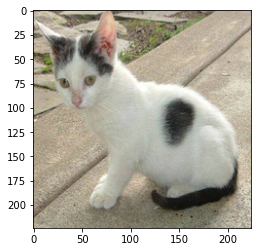

In [34]:
plt.imshow(test_imgs[5])

In [35]:
model_mobilenet.predict(test_imgs)[5]

array([9.9985695e-01, 1.4303344e-04], dtype=float32)

In [36]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively, 
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[5], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
explanation.top_labels[0]

0

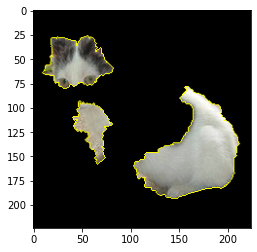

In [38]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, \
                                            num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask))

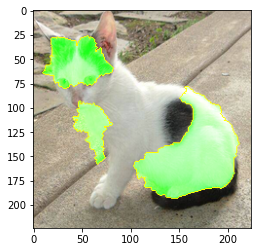

In [39]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], \
                        positive_only=False, num_features=5, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

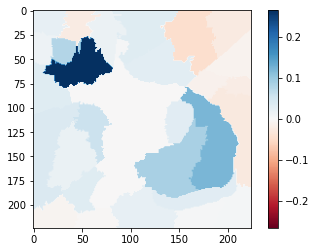

In [40]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

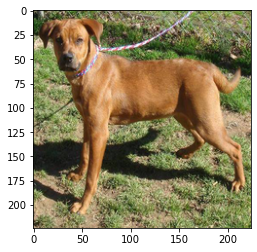

In [41]:
plt.imshow(test_imgs[9])

In [42]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[9], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [43]:
model_mobilenet.predict(test_imgs)[9]

array([1.0040039e-06, 9.9999905e-01], dtype=float32)

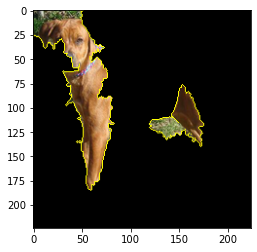

In [44]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=5, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

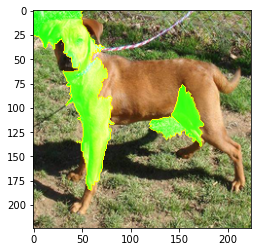

In [45]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=5, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

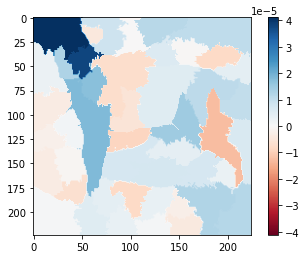

In [46]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

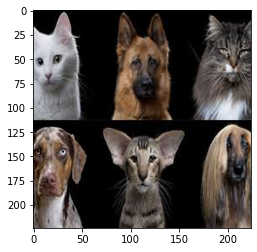

In [47]:
plt.imshow(test_imgs[14])

In [48]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[14], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [49]:
model_mobilenet.predict(test_imgs)[14]

array([0.00493749, 0.99506253], dtype=float32)

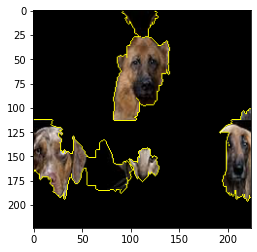

In [50]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=10, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

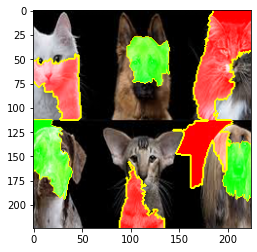

In [51]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=10, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))

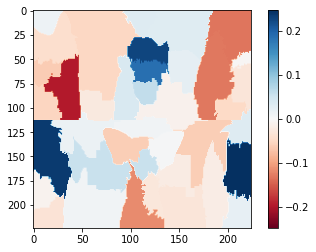

In [52]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [53]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(test_imgs[2], model_mobilenet.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

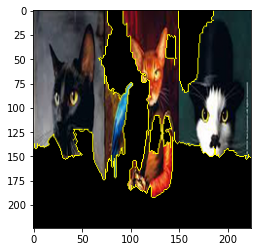

In [54]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=True, num_features=15, hide_rest=True)

plt.imshow(mark_boundaries(temp, mask))

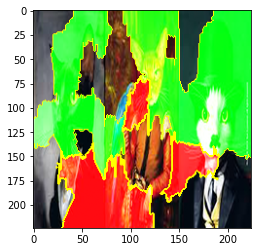

In [55]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0],\
                            positive_only=False, num_features=15, hide_rest=False)

plt.imshow(mark_boundaries(temp, mask))